In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("C:\suicide_rate_dataset.csv")
X = dataset.drop(['suicides/100k pop', 'suicides_no', 'country-year'], axis=1) #delete some "duplicate" features
y = dataset['suicides/100k pop']

In [3]:
X[' gdp_for_year ($) '] = X[' gdp_for_year ($) '].str.replace(',', '').astype(float)

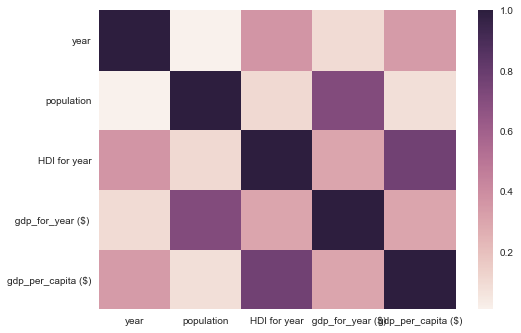

In [4]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

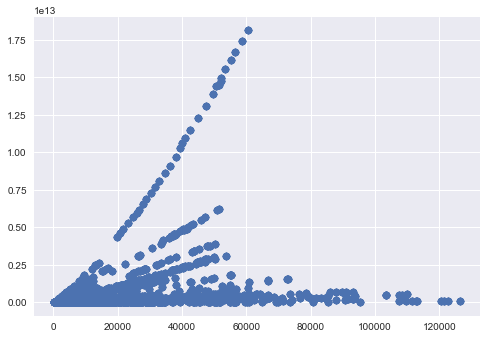

In [5]:
plt.scatter(X['gdp_per_capita ($)'], X[' gdp_for_year ($) '])
plt.show()

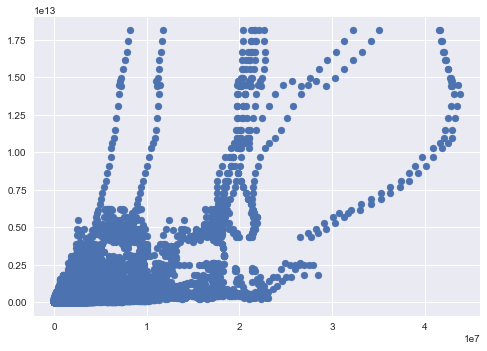

In [6]:
plt.scatter(X['population'], X[' gdp_for_year ($) '])
plt.show()

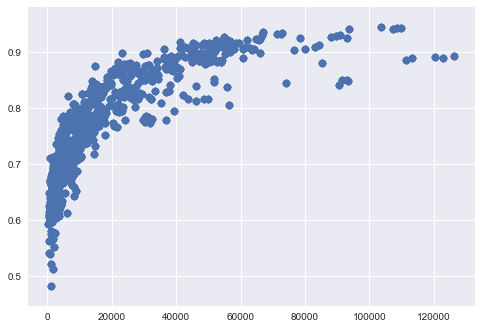

In [7]:
plt.scatter(X['gdp_per_capita ($)'], X['HDI for year'])
plt.show()

In [8]:
X.columns.values

array(['country', 'year', 'sex', 'age', 'population', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'], dtype=object)

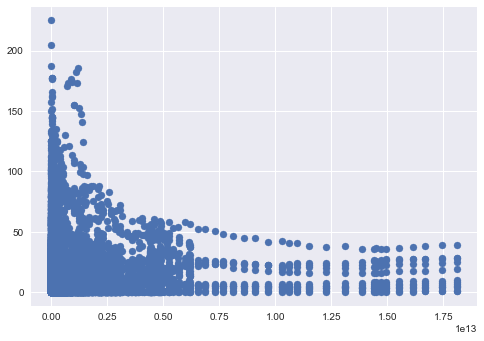

In [9]:
plt.scatter(X[' gdp_for_year ($) '], y)
plt.show()

In [10]:
X = X[y < 125]
y = y[y < 125]

In [11]:
numeric_features = ['year','HDI for year', ' gdp_for_year ($) ', 'population',
                   'gdp_per_capita ($)']
categorical_features = ['country', 'sex', 'age', 'generation']

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler #these all appear to come because HDI wasn't available prior to 2

numeric_transformer = Pipeline(steps=[
    ('imputer', Imputer(missing_values='NaN', strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
X = clf.fit_transform(X)

C:\Users\Sheela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sheela\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [15]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [16]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [17]:
print('The RMSE of the test set is: ' + rms_test.astype(str))
print('The RMSE of the training set is: ' + rms_train.astype(str))

The RMSE of the test set is: 12.349102396924069
The RMSE of the training set is: 12.154845951891337
